In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
sns.set(context= 'talk',style='ticks',font_scale=1,rc ={'axes.spines.right': False,'axes.spines.top': False,'pdf.fonttype':42},palette='colorblind')

In [3]:
data=pd.read_csv('data/ODin_Data.txt',sep='\t').iloc[1:,:].astype(int)
data.index=data.index.astype(int)/60
data.index.name='Time (hrs)'
data.columns=['%s%s'%(i,j) for i in 'ABCDEFGH' for j in range(1,9) ]
data

,A1,A2,A3,A4,A5,A6,A7,A8,B1,B2,...,G7,G8,H1,H2,H3,H4,H5,H6,H7,H8
Time (hrs),,,,,,,,,,,,,,,,,,,,,
0.033333,1633,1637,1646,1640,1628,1612,1612,1627,1598,1595,...,1593,1606,1607,1599,1616,1624,1617,1591,1601,1612
0.366667,1657,1593,1509,1659,1612,1578,1585,1629,1614,1568,...,1579,1521,1581,1606,1533,1565,1601,1607,1610,1620
0.700000,1626,1562,1458,1656,1592,1547,1565,1618,1586,1560,...,1568,1509,1519,1549,1501,1422,1558,1564,1568,1579
1.033333,1617,1539,1515,1656,1571,1523,1547,1613,1667,1550,...,1555,1499,1404,1454,1393,1249,1471,1452,1459,1472
1.366667,1597,1531,1399,1743,1559,1505,1537,1602,1642,1547,...,1544,1491,1406,1464,1390,1249,1471,1477,1482,1495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133.050000,3151,2566,3111,2368,1548,1345,1428,1601,3354,2175,...,1464,2327,3450,2482,2759,2287,1534,1814,1801,1802
133.383333,3214,2574,2589,2368,1548,1345,1429,1586,3340,2177,...,1462,2331,3510,2479,2714,2357,1534,1813,1801,1802
133.716667,3126,2568,2779,2368,1548,1347,1429,1585,3343,2317,...,1463,2320,3619,2480,2481,2292,1533,1814,1801,1801


In [5]:
layout=pd.read_excel('data/ODin_Tube_Map.xlsx',sheet_name='Layout')
layout=layout.dropna()
layout.index=layout.Position
layout.drop('Position',axis=1,inplace=True)
layout_dict=layout.to_dict()['Condition']
layout_dict

{'A1': 'A5',
 'A2': 'B5',
 'A3': 'C5',
 'A4': 'D5',
 'A5': 'E5',
 'A6': 'B12',
 'A7': 'D11',
 'A8': 'E11',
 'B1': 'A6',
 'B2': 'B6',
 'B3': 'C6',
 'B4': 'D6',
 'B5': 'E6',
 'B6': 'A10',
 'B7': 'B10',
 'B8': 'D12',
 'C1': 'A7',
 'C2': 'B7',
 'C3': 'C7',
 'C4': 'D7',
 'C5': 'E7',
 'C6': 'C10',
 'C7': 'D10',
 'C8': 'E12',
 'D1': 'A8',
 'D2': 'B8',
 'D3': 'C8',
 'D4': 'D8',
 'D5': 'E8',
 'D6': 'E9',
 'D7': 'E10',
 'D8': 'A12',
 'E1': 'A4',
 'E2': 'B4',
 'E3': 'C4',
 'E4': 'D4',
 'E5': 'E4',
 'E6': 'D9',
 'E7': 'A11',
 'E8': 'B11',
 'F1': 'A3',
 'F2': 'B3',
 'F3': 'C3',
 'F4': 'D3',
 'F6': 'E3',
 'F7': 'B9',
 'F8': 'C9',
 'G1': 'A2',
 'G2': 'B2',
 'G3': 'C2',
 'G4': 'D2',
 'G7': 'E2',
 'G8': 'A9',
 'H1': 'A1',
 'H2': 'B1',
 'H3': 'C1',
 'H4': 'D1',
 'H5': 'E1'}

In [6]:
ODs=pd.read_excel('data/ODin_Tube_Map.xlsx',sheet_name='ODs',index_col=0)
ODs

,OD1,OD2.1,OD2.2
Condition,,,
A1,0.015,0.199,0.230
A2,0.022,0.105,0.115
A3,0.017,0.097,0.105
A4,0.019,0.097,0.105
A5,0.015,0.094,0.102
A6,0.019,0.101,0.110
A7,0.016,0.096,0.104
A8,0.016,0.096,0.108
A9,0.016,0.084,0.093


In [7]:
media=pd.read_excel('data/ODin_Tube_Map.xlsx',sheet_name='Conditions'
                   )
media.index=media.Condition
media_dict=media.Media.to_dict()
media_dict

{'A': '0 mM Nitrite',
 'B': '1 mM Nitrite',
 'D': '2.5 mM Nitrite',
 'C': '5 mM Nitrite',
 'E': '10 mM Nitrite'}

In [8]:
condition_dict={}
for key in layout_dict:
    item=layout_dict[key]
    if '11' in item or '12' in item:
        cond = media_dict[item[0]] + ',Blank'
    else:
        cond = media_dict[item[0]] + ',Rep%s'%(item[1:])
    condition_dict[key]=cond
condition_dict

{'A1': '0 mM Nitrite,Rep5',
 'A2': '1 mM Nitrite,Rep5',
 'A3': '5 mM Nitrite,Rep5',
 'A4': '2.5 mM Nitrite,Rep5',
 'A5': '10 mM Nitrite,Rep5',
 'A6': '1 mM Nitrite,Blank',
 'A7': '2.5 mM Nitrite,Blank',
 'A8': '10 mM Nitrite,Blank',
 'B1': '0 mM Nitrite,Rep6',
 'B2': '1 mM Nitrite,Rep6',
 'B3': '5 mM Nitrite,Rep6',
 'B4': '2.5 mM Nitrite,Rep6',
 'B5': '10 mM Nitrite,Rep6',
 'B6': '0 mM Nitrite,Rep10',
 'B7': '1 mM Nitrite,Rep10',
 'B8': '2.5 mM Nitrite,Blank',
 'C1': '0 mM Nitrite,Rep7',
 'C2': '1 mM Nitrite,Rep7',
 'C3': '5 mM Nitrite,Rep7',
 'C4': '2.5 mM Nitrite,Rep7',
 'C5': '10 mM Nitrite,Rep7',
 'C6': '5 mM Nitrite,Rep10',
 'C7': '2.5 mM Nitrite,Rep10',
 'C8': '10 mM Nitrite,Blank',
 'D1': '0 mM Nitrite,Rep8',
 'D2': '1 mM Nitrite,Rep8',
 'D3': '5 mM Nitrite,Rep8',
 'D4': '2.5 mM Nitrite,Rep8',
 'D5': '10 mM Nitrite,Rep8',
 'D6': '10 mM Nitrite,Rep9',
 'D7': '10 mM Nitrite,Rep10',
 'D8': '0 mM Nitrite,Blank',
 'E1': '0 mM Nitrite,Rep4',
 'E2': '1 mM Nitrite,Rep4',
 'E3': '5 mM Ni

In [9]:
mapped=data.copy()
mapped=mapped.stack().reset_index()
mapped.columns=['Time (hrs)','Layout','mA']
mapped['Condition']=mapped.Layout.map(condition_dict).fillna('Empty')
mapped

,Time (hrs),Layout,mA,Condition
0,0.033333,A1,1633,"0 mM Nitrite,Rep5"
1,0.033333,A2,1637,"1 mM Nitrite,Rep5"
2,0.033333,A3,1646,"5 mM Nitrite,Rep5"
3,0.033333,A4,1640,"2.5 mM Nitrite,Rep5"
4,0.033333,A5,1628,"10 mM Nitrite,Rep5"
...,...,...,...,...
25851,134.383333,H4,2289,"2.5 mM Nitrite,Rep1"
25852,134.383333,H5,1533,"10 mM Nitrite,Rep1"
25853,134.383333,H6,1814,Empty
25854,134.383333,H7,1802,Empty


In [10]:
mapped['OD1']=np.nan
mapped['OD2.1']=np.nan
mapped['OD2.2']=np.nan
for i in mapped.index:
    pos = mapped.loc[i,'Layout']
    if pos in layout_dict:
        mapped.loc[i,['OD1','OD2.1','OD2.2']]=ODs.loc[layout_dict[pos]].values
mapped

,Time (hrs),Layout,mA,Condition,OD1,OD2.1,OD2.2
0,0.033333,A1,1633,"0 mM Nitrite,Rep5",0.015,0.094,0.102
1,0.033333,A2,1637,"1 mM Nitrite,Rep5",0.015,0.080,0.094
2,0.033333,A3,1646,"5 mM Nitrite,Rep5",0.013,0.073,0.089
3,0.033333,A4,1640,"2.5 mM Nitrite,Rep5",0.012,0.075,0.092
4,0.033333,A5,1628,"10 mM Nitrite,Rep5",0.015,0.013,0.016
...,...,...,...,...,...,...,...
25851,134.383333,H4,2289,"2.5 mM Nitrite,Rep1",0.011,0.076,0.090
25852,134.383333,H5,1533,"10 mM Nitrite,Rep1",0.016,0.009,0.010
25853,134.383333,H6,1814,Empty,NaN,NaN,NaN
25854,134.383333,H7,1802,Empty,NaN,NaN,NaN


In [11]:
reps=[]
conds=[]
for i in mapped.Condition:
    j=i.split(',')[0]
    if i != 'Empty':
        i=i.split(',')[1][3:]
    else:
        i=np.nan
    reps.append(i)
    conds.append(j)
mapped['media']=conds
mapped['replicate']=reps
mapped

,Time (hrs),Layout,mA,Condition,OD1,OD2.1,OD2.2,media,replicate
0,0.033333,A1,1633,"0 mM Nitrite,Rep5",0.015,0.094,0.102,0 mM Nitrite,5
1,0.033333,A2,1637,"1 mM Nitrite,Rep5",0.015,0.080,0.094,1 mM Nitrite,5
2,0.033333,A3,1646,"5 mM Nitrite,Rep5",0.013,0.073,0.089,5 mM Nitrite,5
3,0.033333,A4,1640,"2.5 mM Nitrite,Rep5",0.012,0.075,0.092,2.5 mM Nitrite,5
4,0.033333,A5,1628,"10 mM Nitrite,Rep5",0.015,0.013,0.016,10 mM Nitrite,5
...,...,...,...,...,...,...,...,...,...
25851,134.383333,H4,2289,"2.5 mM Nitrite,Rep1",0.011,0.076,0.090,2.5 mM Nitrite,1
25852,134.383333,H5,1533,"10 mM Nitrite,Rep1",0.016,0.009,0.010,10 mM Nitrite,1
25853,134.383333,H6,1814,Empty,NaN,NaN,NaN,Empty,NaN
25854,134.383333,H7,1802,Empty,NaN,NaN,NaN,Empty,NaN


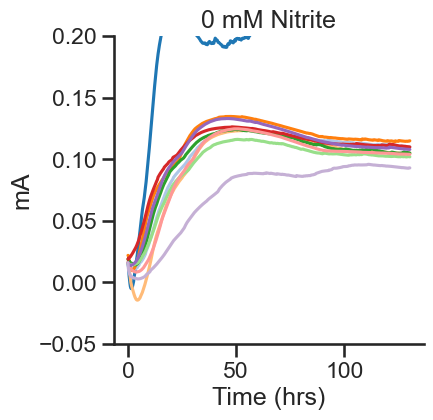

<Figure size 640x480 with 0 Axes>

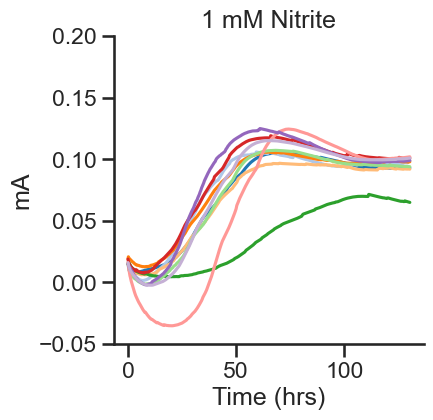

<Figure size 640x480 with 0 Axes>

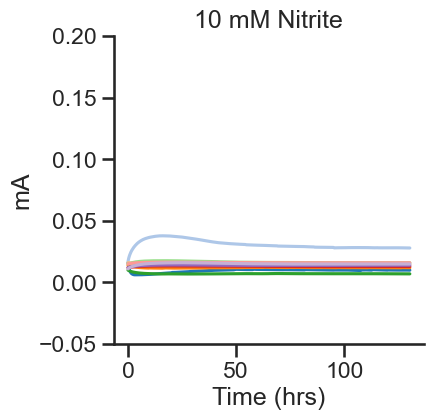

<Figure size 640x480 with 0 Axes>

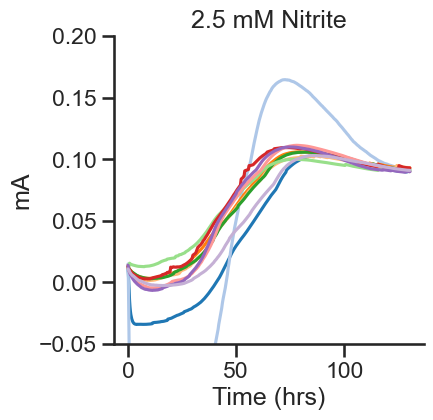

<Figure size 640x480 with 0 Axes>

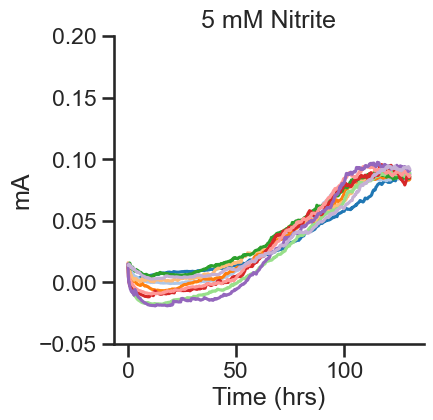

<Figure size 640x480 with 0 Axes>

In [12]:
from scipy.stats import linregress
colors=sns.color_palette('tab20',12)
lags={}
maxOD={}
for media,df in mapped.groupby(by='media'):
    if media =='Empty':
        break
    plt.figure(figsize=(4,4))
    plt.title(media)
    lags[media]=[]
    maxOD[media]=[]
    i=0
  
    for rep,df2 in df.groupby(by='replicate'):
        if rep == 'nk':
            continue
        df2=df2.loc[:,['Time (hrs)','mA','OD1','OD2.1','OD2.2']]
        ewm=df2.ewm(span = 25).mean()
        x=ewm.iloc[[0,-1]]['mA'].values
        y=ewm[['OD1','OD2.2']].iloc[0].values
        fit = linregress(x,y)
        
        x2=ewm['Time (hrs)'].values
        y2=ewm['mA'].values
        y3=fit.slope*y2+fit.intercept
        if len(x2[y3>.05]) > 0:
            lag=x2[y3>.05][0]
        else:
            lag=x2[-1]
        lags[media].append(lag)
        maxOD[media].append(y3.max())
        #y2=y2/y2.max()
        plt.plot(x2,y3,color=colors[i])
        i+=1
    plt.xlabel('Time (hrs)')
    plt.ylabel('mA')
    plt.ylim(-.05,.2)
    plt.show()
    plt.clf()

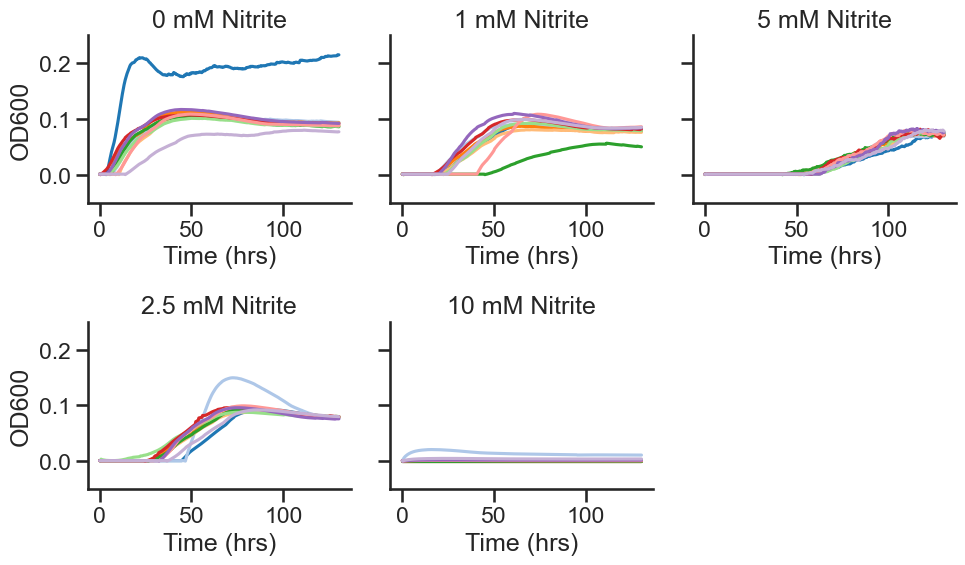

In [13]:
colors=sns.color_palette('tab20',12)
maxOD={}
fig= plt.figure(figsize=(10,6))
trash=[]
j=1
res=pd.DataFrame()
for media in mapped.media.unique():
    df = mapped[mapped.media==media]
    if media =='Empty':
        break
    ax=fig.add_subplot(2,3,j)
    ax.set_title(media)
    lags[media]=[]
    i=0
    maxOD[media]=[]
    for rep,df2 in df.groupby(by='replicate'):
        if rep == 'nk':
            continue
        df2=df2.loc[:,['Time (hrs)','mA','OD1','OD2.1','OD2.2']]
        ewm=df2.ewm(span = 25).mean()
        x=ewm.iloc[[0,-1]]['mA'].values
        y=ewm[['OD1','OD2.2']].iloc[0].values
        fit = linregress(x,y)
        
        x2=ewm['Time (hrs)'].values
        y2=ewm['mA'].values
        y3=fit.slope*y2+fit.intercept
        y3=y3-y3[0]
        y3[y3<=0]=0.001
        
        ax.plot(x2,y3,color=colors[i])
        i+=1
        if len(y3[y3>.2])>0 or len(y3[y3<-0.025])>0:
            trash.append((media,rep))
            maxOD[media].append(np.nan)
        else:
            od=pd.DataFrame([x2,y3]).T
            od.columns=['Time (hrs)','OD600']
            od['media']=media
            od['replicate']=rep
            res=pd.concat([res,od])
            maxOD[media].append(od['OD600'].max())
    plt.ylim(-.05,.25)
    if j != 1 and j != 4:
        ax.set_yticklabels([])
    else:
        ax.set_ylabel('OD600')
    ax.set_xlabel('Time (hrs)')
    j+=1
    
plt.tight_layout()
#plt.savefig('3H11-ODin-OD600.png',dpi=250,bbox_inches='tight')

Text(0.5, 1.0, '3H11')

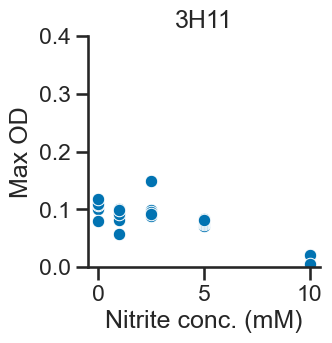

In [14]:
maxod=res.groupby(by=['media','replicate']).max().reset_index()
maxod['nitrite']=[float(x.split()[0]) for x in maxod.media]
maxod=maxod[maxod.media.str.contains('Nitrite')].drop([16,17])

plt.figure(figsize=(3,3))
sns.scatterplot(x='nitrite',y='OD600',data=maxod)
plt.xlim(-0.5,10.5)
plt.ylim(0,.4)
plt.ylabel('Max OD')
plt.xlabel('Nitrite conc. (mM)')
plt.title('3H11')
#plt.savefig('3H11-Nitrite-maxOD.pdf',bbox_inches='tight')

(-0.01, 0.21)

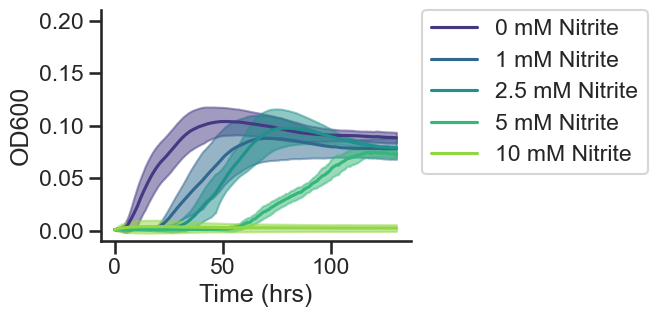

In [15]:
res.replicate=res.replicate.astype(int)
mean=res.groupby(by=['media','Time (hrs)']).mean()
std=res.groupby(by=['media','Time (hrs)']).std()

conditions=['0 mM Nitrite', '1 mM Nitrite','2.5 mM Nitrite',
       '5 mM Nitrite','10 mM Nitrite' ]    
colors=sns.color_palette('viridis',5)
plt.figure(figsize=(4,3))
i=0
for idx in conditions:
    
    df=mean.loc[idx].reset_index()
    #df['OD600']=df['OD600']-df['OD600'].min()
    err=std.loc[idx].reset_index()
    plt.plot(df['Time (hrs)'],df['OD600'],label=idx,color=colors[i])
    plt.fill_between(df['Time (hrs)'].values,df['OD600'].values-err['OD600'].values,df['OD600'].values+err['OD600'].values,alpha=0.5,color=colors[i])
   
    i+=1
plt.xlabel('Time (hrs)')
plt.ylabel('OD600')
plt.legend(bbox_to_anchor=(1,1.05),loc=2)

#plt.yscale('log')
#plt.xlim(0,50)
plt.ylim(-.01,0.21)
#plt.yscale('log')
#plt.ylim(10**-3,2*10**-1)
#plt.savefig('3H11-N02-tox.pdf',bbox_inches='tight')